# PROBLEM STATEMENT

# Dataset Information
This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.


In [8]:
pip install lambda

  Created wheel for lambda: filename=lambda-0.0.1-py3-none-any.whl size=2351 sha256=f916026d2d611a28bcd55d16168cf685cbdb1ed9dc1a353ece90af9445ad5807
  Stored in directory: /Users/deepbhatt/Library/Caches/pip/wheels/02/35/33/1d299c277449d942dfa1e708fdff38846851b9230390c90c85
Successfully built lambda
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing Modules

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df= pd.read_csv('Black Friday.csv')

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
# checking the Information of the table

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.isnull().sum() # Checking the Null Values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
# Checking the unique Data
 
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

# Exploratory Data Analysis

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

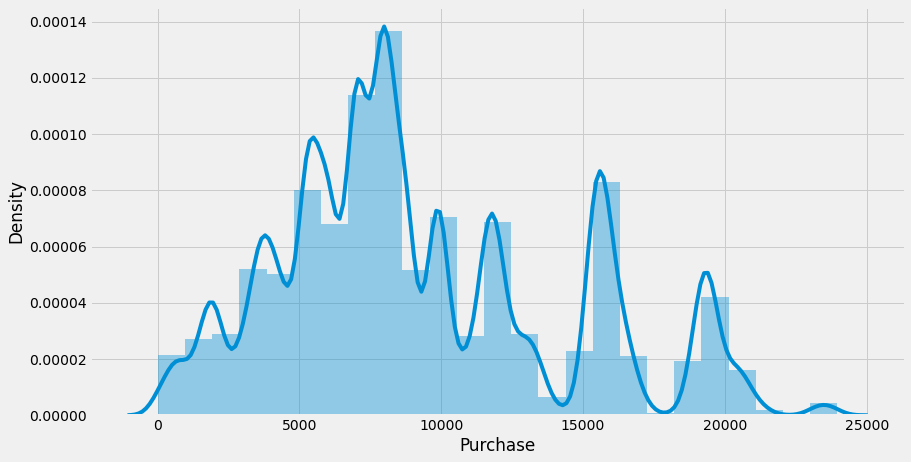

In [15]:
# Displot for attribute 

plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(df['Purchase'], bins=25)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

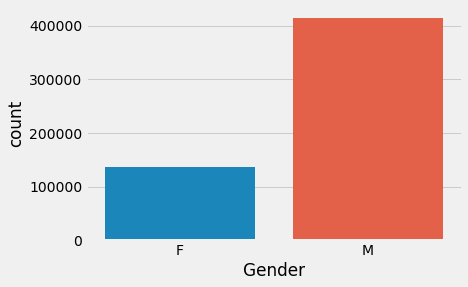

In [16]:
# Distribution of the Numeric Variables

sns.countplot(df['Gender'])

# As you can see Male is higher because black friday is has more tech pur and thats why male purchase it more

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

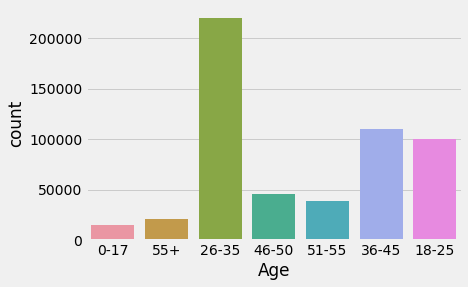

In [17]:
 # perform countplot for Age
    
sns.countplot(df['Age'])    

# You can see that 26 -35 has purchased more products than other categories

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

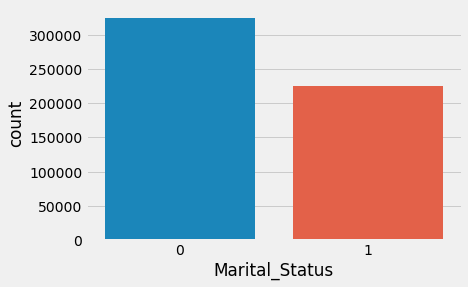

In [21]:
# Perform countplot for Maritial Status

sns.countplot(df['Marital_Status'])

# Please refer the outcome that 0 represent Single and 1 Married it is observed that Majority of people purchased is Single

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

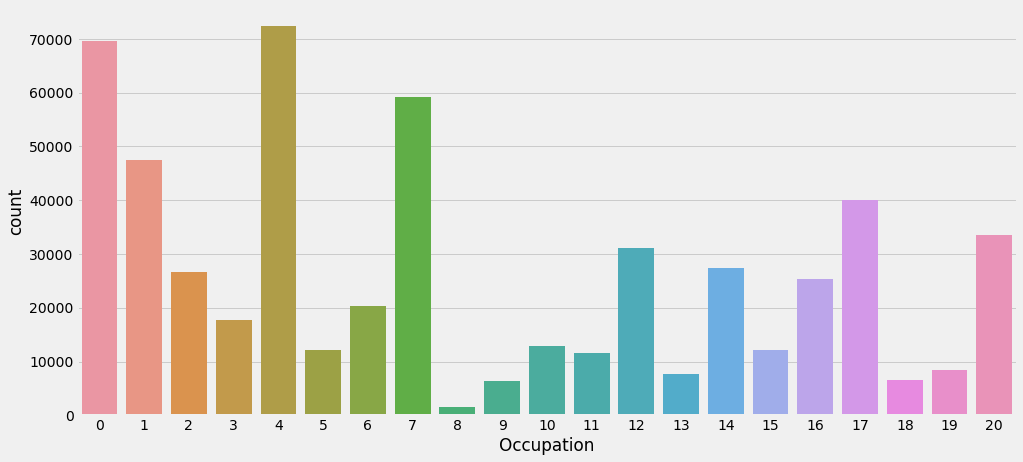

In [23]:
# Perform the Countplot for Occupation
plt.figure(figsize=(15,7))
sns.countplot(df['Occupation'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

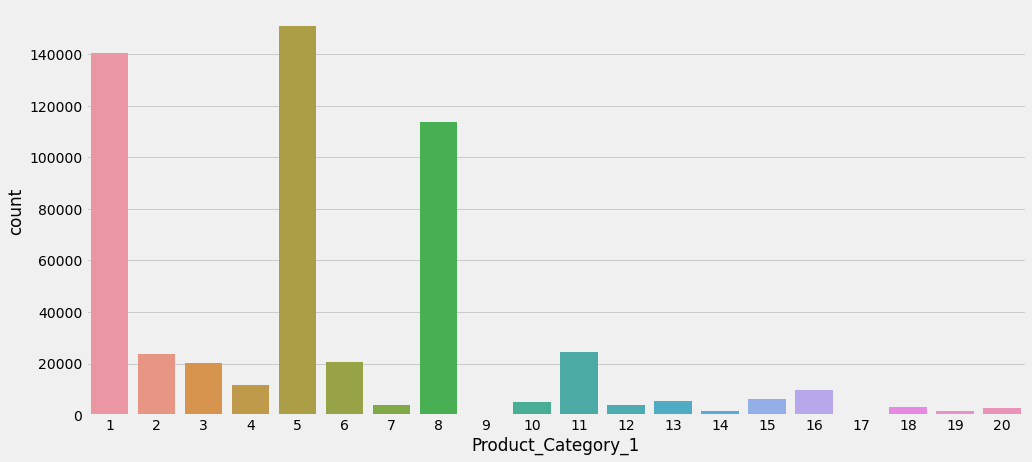

In [27]:
# Perform countplot for Product Category 1
plt.figure(figsize=(15,7))
sns.countplot(df['Product_Category_1'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

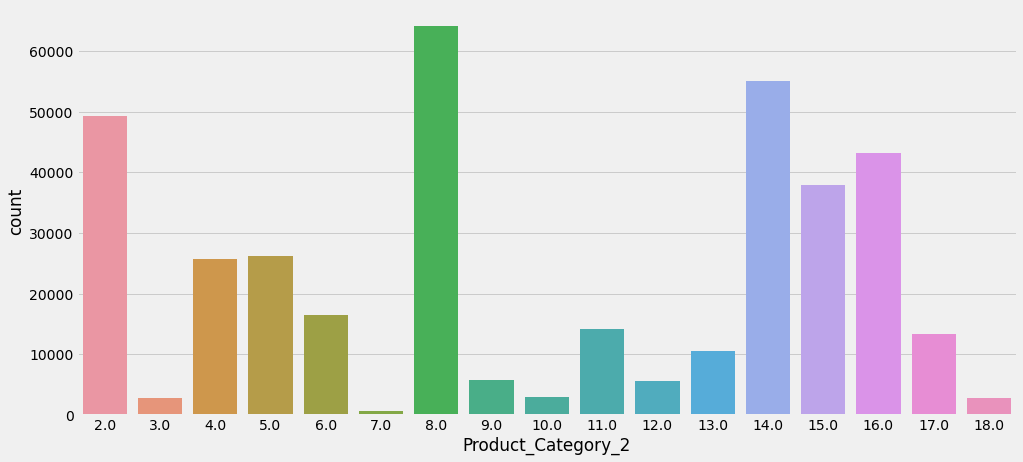

In [28]:
# Perform Countplot on Product Category 2

plt.figure(figsize=(15,7))
sns.countplot(df['Product_Category_2'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

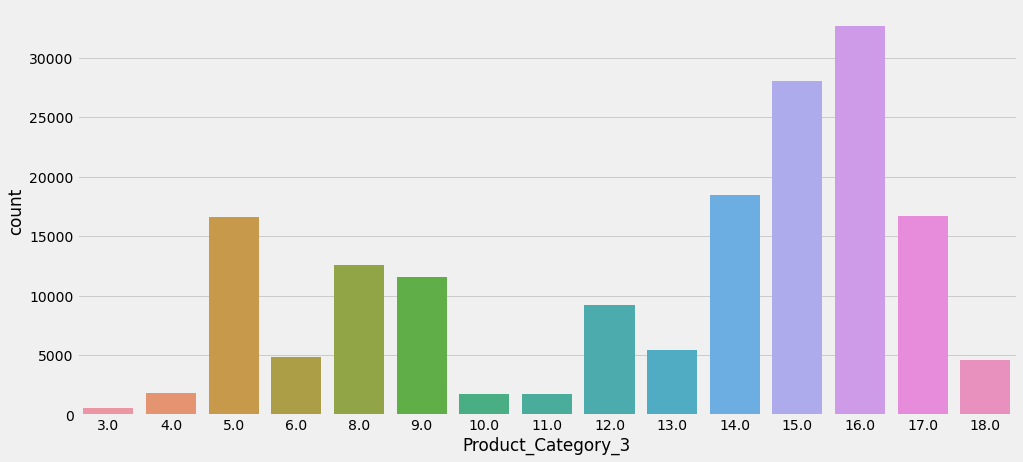

In [29]:
# Perform countplot for Product Category 3

plt.figure(figsize=(15,7))
sns.countplot(df['Product_Category_3'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

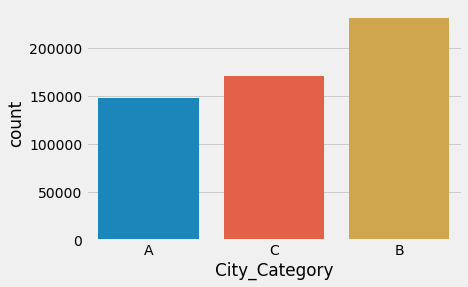

In [30]:
# Perform Countplot for City Categorieswise
 

sns.countplot(df['City_Category'])

# Bases on the countplot B Represent Urban area A represent Rural area and C represent Semi Urban Area

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

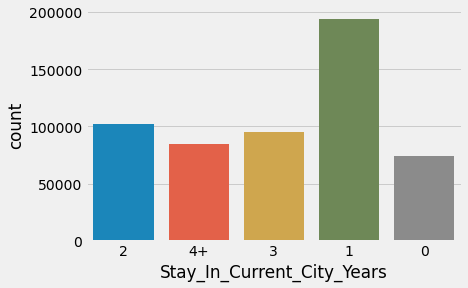

In [32]:
# Perform the count plot for Stay in the city

sns.countplot(df['Stay_In_Current_City_Years'])

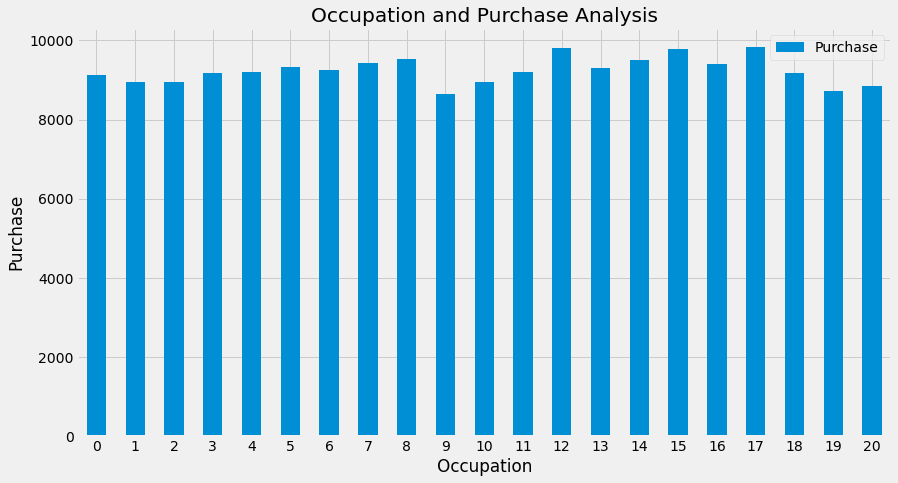

In [40]:
# Bivariate analysis using 2 variants

occupation_plot = df.pivot_table(index='Occupation', values = 'Purchase' , aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

# the upper syntax shows 2 diffrent plot which is called as bivariate plot for joining double results for Analysis

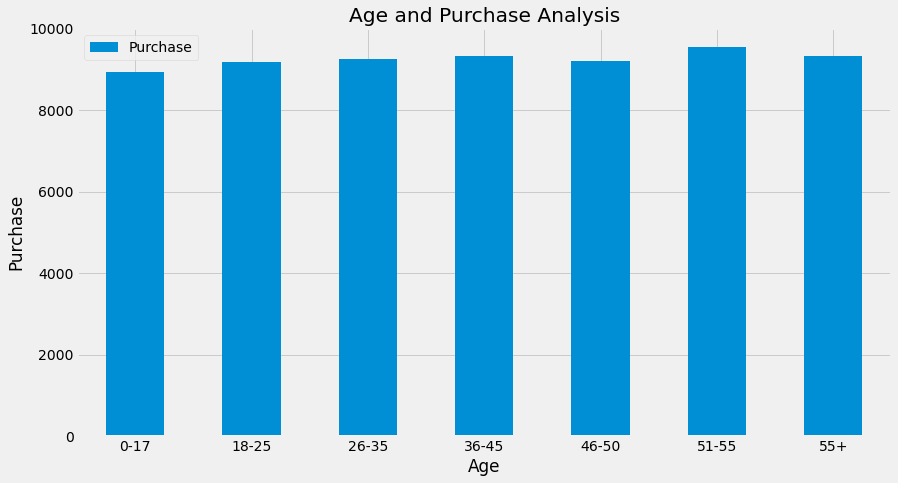

In [43]:
# Age And Purchase

age_plot = df.pivot_table(index='Age', values = 'Purchase' , aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

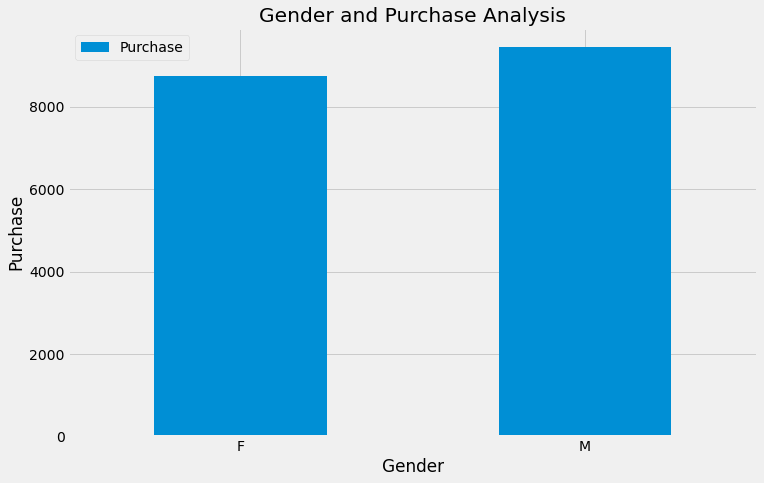

In [45]:
# Perform for Gender 

gender_plot = df.pivot_table(index='Gender', values = 'Purchase' , aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(11,7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

# Preprocessing Dataset

In [46]:
# Check for Null Values

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [50]:
# Fill the Null values 

df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [51]:
# Re checkh the Null values are now filled 

df.isnull().sum()

# Now all the Missing values are now been filled.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [53]:
# Converting Categorical data into Numerical attributes

gender_dict ={'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

# For Changing the Gender into Numerical Attribute use dictionary function and lambda and you can see the out put below

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [55]:
# Label Encoding Columns

cols =['Age', 'City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()    

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


# Coorelation Matrix

<AxesSubplot:>

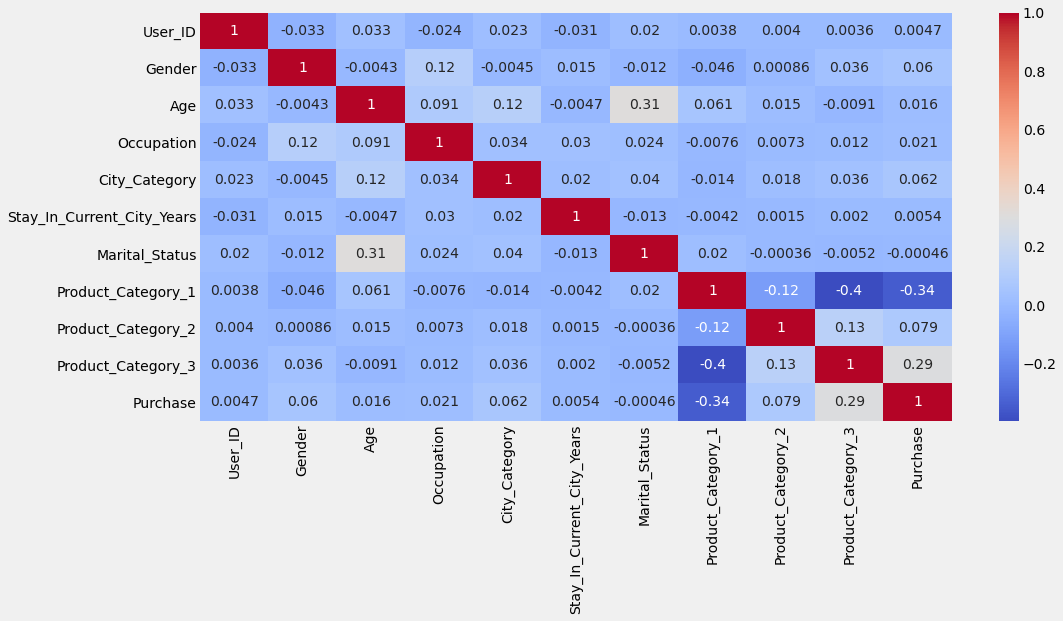

In [57]:
corr = df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot =True, cmap='coolwarm')


# Input Split

In [58]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [61]:
# Remove the columns

x = df.drop(columns=['User_ID','Product_ID','Purchase'])
y = df['Purchase']        

# MODEL TRAINING

In [67]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, x,y):
    #Train - test split
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.25)
    model.fit(x_train,y_train)
    
    #Predict the results
    pred = model.predict(x_test)
    
    #Cross Validation
    
    cv_score = cross_val_score(model,x,y, scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score", np.sqrt(cv_score))

Results
MSE 4617.994034201719
CV Score 4625.252945835688


<AxesSubplot:title={'center':'Model Coefficients'}>

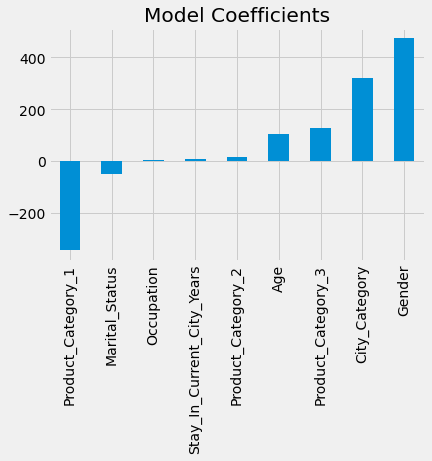

In [68]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model,x,y)
coef = pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar', title = 'Model Coefficients')

Results
MSE 3365.447564468541
CV Score 3339.829092322566


<AxesSubplot:title={'center':'Feature Importance'}>

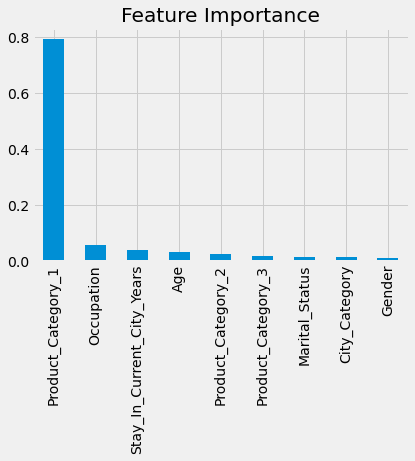

In [74]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,x,y)
features = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind='bar', title = 'Feature Importance')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs= -1)
train(model,x,y)
features = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind='bar', title = 'Feature Importance')

In [ ]:
from sklearn.ensemble import ExtraTreeRegressor
model = ExtraTreeRegressor(n_jobs= -1)
train(model,x,y)
features = pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
features.plot(kind='bar', title = 'Feature Importance')

In [ ]:
# Please note that the above Models can take time to train wait for sometime

